In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta, timezone

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
hisseler = ['A']
hisse_fiyatlari_a = yf.download(hisseler,start = '2017-01-01',end = '2020-01-01',
                              interval='1d', prepost=True)
hisse_fiyatlari_a["Average"] = (hisse_fiyatlari_a["High"] + hisse_fiyatlari_a["Low"])/2
display(hisse_fiyatlari_a.head())

hisseler = ['B']
hisse_fiyatlari_b = yf.download(hisseler,start = '2017-01-01',end = '2020-01-01',
                              interval='1d', prepost=True)
hisse_fiyatlari_b["Average"] = (hisse_fiyatlari_b["High"] + hisse_fiyatlari_b["Low"])/2
display(hisse_fiyatlari_b.head())

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2017-01-03,45.930000,46.750000,45.740002,46.490002,44.773853,1739600,46.245001
2017-01-04,46.930000,47.380001,46.820000,47.099998,45.361336,1821300,47.100000
2017-01-05,47.049999,47.070000,46.360001,46.540001,44.822021,1503700,46.715000
2017-01-06,46.630001,48.070000,46.560001,47.990002,46.218483,2883400,47.315001
2017-01-09,48.009998,48.560001,47.910000,48.139999,46.362946,2575300,48.235001


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2017-01-03,48.189999,48.240002,47.439999,48.000000,45.554081,131100,47.840
2017-01-04,48.119999,48.500000,47.889999,48.369999,45.905220,205600,48.195
2017-01-05,48.290001,48.299999,46.910000,47.340000,44.927704,185000,47.605
2017-01-06,47.630001,47.930000,47.119999,47.669998,45.240883,215200,47.525
2017-01-09,47.320000,47.330002,46.459999,46.689999,44.310825,172300,46.895


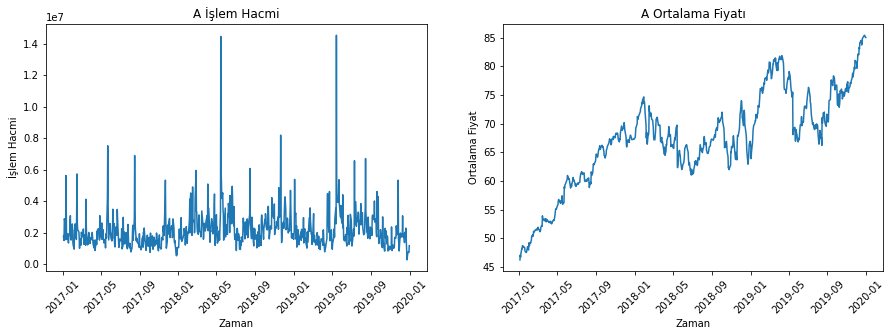

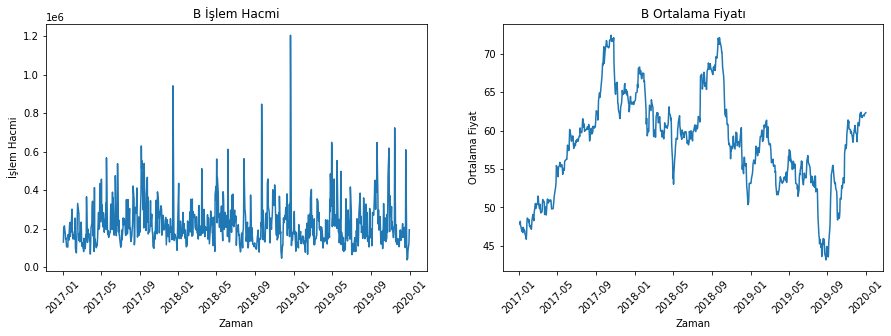

In [4]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
sns.lineplot(x = hisse_fiyatlari_a.index, y = hisse_fiyatlari_a.Volume)
plt.title("A İşlem Hacmi")
plt.xlabel("Zaman")
plt.ylabel("İşlem Hacmi")
plt.xticks(rotation = 45)

plt.subplot(222)
sns.lineplot(x = hisse_fiyatlari_a.index, y = hisse_fiyatlari_a.Average)
plt.title("A Ortalama Fiyatı")
plt.xlabel("Zaman")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation = 45)

plt.figure(figsize=(15, 10))
plt.subplot(223)
sns.lineplot(x = hisse_fiyatlari_b.index, y = hisse_fiyatlari_b.Volume)
plt.title("B İşlem Hacmi")
plt.xlabel("Zaman")
plt.ylabel("İşlem Hacmi")
plt.xticks(rotation = 45)

plt.subplot(224)
sns.lineplot(x = hisse_fiyatlari_b.index, y = hisse_fiyatlari_b.Average)
plt.title("B Ortalama Fiyatı")
plt.xlabel("Zaman")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation = 45)

plt.show()

In [5]:
girdi_verileri_a = hisse_fiyatlari_a.iloc[:,[5,6]].values

sc= MinMaxScaler(feature_range=(0,1))
girdi_verileri_a[:,0:2] = sc.fit_transform(girdi_verileri_a[:,:])

girdi_verileri_b = hisse_fiyatlari_b.iloc[:,[5,6]].values

sc= MinMaxScaler(feature_range=(0,1))
girdi_verileri_b[:,0:2] = sc.fit_transform(girdi_verileri_b[:,:])

In [6]:
lookback= 50

test_size_a=int(.3 * len(hisse_fiyatlari_a))
X_a=[]
y_a=[]
for i in range(len(hisse_fiyatlari_a)-lookback-1):
    t_a=[]
    for j in range(0,lookback):
        
        t_a.append(girdi_verileri_a[[(i+j)], :])
    X_a.append(t_a)
    y_a.append(girdi_verileri_a[i+ lookback,1])
    
    

In [7]:
lookback= 50

test_size_b=int(.3 * len(hisse_fiyatlari_b))
X_b=[]
y_b=[]
for i in range(len(hisse_fiyatlari_b)-lookback-1):
    t_b=[]
    for j in range(0,lookback):
        
        t_b.append(girdi_verileri_b[[(i+j)], :])
    X_b.append(t_b)
    y_b.append(girdi_verileri_b[i+ lookback,1])
    
    

In [8]:
print(X_a[1][-1])
print(y_a[0])
print("-----------")
print(X_a[100][-1])
print(y_a[99])

[[0.16874943 0.18378033]]
0.18378032605187355
-----------
[[0.04938289 0.3628352 ]]
0.3628352019097847


In [9]:
print(X_b[1][-1])
print(y_b[0])
print("-----------")
print(X_b[100][-1])
print(y_b[99])

[[0.09643408 0.26893485]]
0.26893484511605625
-----------
[[0.10809189 0.58215077]]
0.5821507652579896


In [10]:
X_a, y_a= np.array(X_a), np.array(y_a)
X_test_a = X_a[:test_size_a+lookback]
X_a = X_a.reshape(X_a.shape[0],lookback, 2)
X_test_a = X_test_a.reshape(X_test_a.shape[0],lookback, 2)
print(X_a.shape)
print(X_test_a.shape)

(703, 50, 2)
(276, 50, 2)


In [11]:
X_b, y_b= np.array(X_b), np.array(y_b)
X_test_b = X_b[:test_size_b+lookback]
X_b = X_b.reshape(X_b.shape[0],lookback, 2)
X_test_b = X_test_b.reshape(X_test_b.shape[0],lookback, 2)
print(X_b.shape)
print(X_test_b.shape)

(703, 50, 2)
(276, 50, 2)


In [12]:
from keras import Sequential
from keras.layers import Dense, LSTM

model_a = Sequential()
model_a.add(LSTM(units=30, return_sequences= True, input_shape=(X_a.shape[1],2)))
model_a.add(LSTM(units=30, return_sequences=True))
model_a.add(LSTM(units=30))
model_a.add(Dense(units=1))
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 30)            3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_a.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
model_a.fit(X_a, y_a, epochs=300, batch_size=64, verbose=0)


In [15]:
tahmin_değerleri_a= model_a.predict(X_test_a)


In [16]:
model_b = Sequential()
model_b.add(LSTM(units=30, return_sequences= True, input_shape=(X_b.shape[1],2)))
model_b.add(LSTM(units=30, return_sequences=True))
model_b.add(LSTM(units=30))
model_b.add(Dense(units=1))
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_b.compile(optimizer='adam', loss='mean_squared_error')


In [18]:
model_b.fit(X_a, y_a, epochs=100, batch_size=32, verbose=0)


In [19]:
tahmin_değerleri_b= model_b.predict(X_test_b)


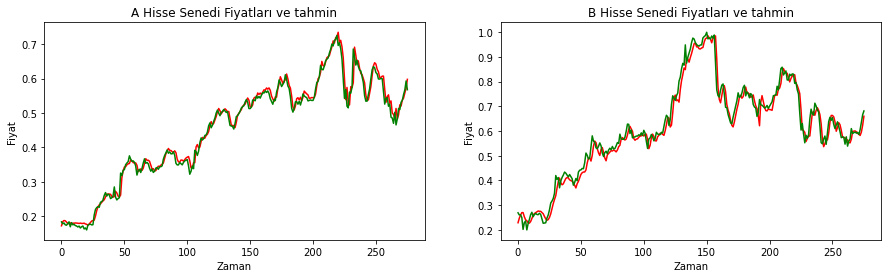

In [20]:
plt.figure(figsize=(15,4))
plt.subplot(121)

plt.plot(tahmin_değerleri_a, color= 'red')
plt.plot(girdi_verileri_a[lookback:test_size_a+(2*lookback),1], color='green')
plt.title("A Hisse Senedi Fiyatları ve tahmin")
plt.xlabel("Zaman")
plt.ylabel("Fiyat")

plt.subplot(122)

plt.plot(tahmin_değerleri_b, color= 'red')
plt.plot(girdi_verileri_b[lookback:test_size_b+(2*lookback),1], color='green')
plt.title("B Hisse Senedi Fiyatları ve tahmin")
plt.xlabel("Zaman")
plt.ylabel("Fiyat")
plt.show()